In [86]:
from calibration_metrics import partition_bins
import matplotlib.pyplot as plt
import torch
%matplotlib inline
plt.style.use('ggplot')

In [87]:
def plot_reliability_diagrams(fname, predictions, confidences, references):
    bins, bin_sizes, bin_accs, bin_avg_confs = partition_bins(predictions, confidences, references)
    bins = bins.detach().numpy()
    bin_accs = bin_accs.detach().numpy()
    bin_avg_confs = bin_avg_confs.detach().numpy()

    plt.bar(bins, bin_avg_confs, width=0.1, alpha=0.3, edgecolor='black', hatch='/', label="expected acc.")
    plt.bar(bins, bin_accs, width=0.1, alpha=0.7, edgecolor='black', label="acc.")
    plt.plot([0, 1.05],[0, 1.05], '--', color='gray', linewidth=2)
    plt.ylim([0, 1.05])
    plt.xlim([0, 1.05])
    plt.xlabel('Confidence')
    plt.ylabel('Accuracy')
    plt.tight_layout()
    plt.legend()
    # plt.show()
    plt.savefig(f"figures/classification/{fname}.pdf")
    
def load_outputs(path):
    predictions = torch.load(f"{path}/predictions.pt")
    confidences = torch.load(f"{path}/confidences.pt")
    references = torch.load(f"{path}/references.pt")
    
    return predictions, confidences, references

def confidences_histogram(fname, confidences):
    plt.hist(confidences.tolist(), bins=100, range=(0,1))
    # plt.show()
    plt.savefig(f"figures/classification/{fname}.pdf")

# Reliability Diagram of Single Model
## CIFAR-10
### Uncalibrated

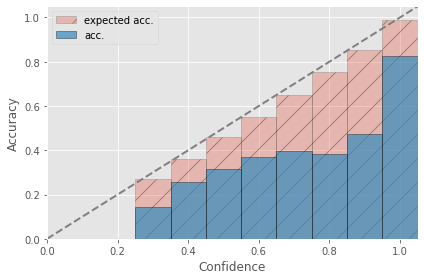

In [88]:
predictions, confidences, references = load_outputs("outputs/resnet_cifar-10_0.7332_0.1896_0.3828")
plot_reliability_diagrams("single/RD-cifar-uncali", predictions, confidences, references)

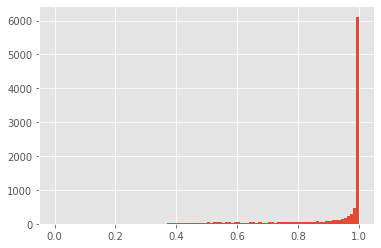

In [89]:
confidences_histogram("single/CH-cifar-uncali", confidences)

### Platt

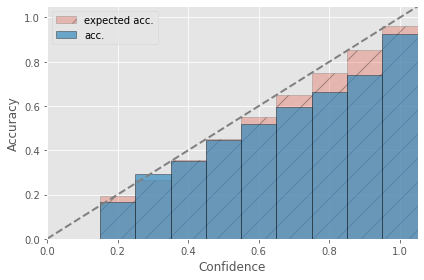

In [90]:
predictions, confidences, references = load_outputs("outputs/resnet-platt_cifar-10_0.7170_0.0495_0.1130")
plot_reliability_diagrams("single/RD-cifar-platt", predictions, confidences, references)

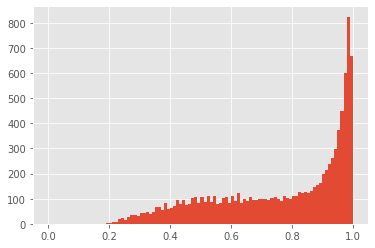

In [91]:
confidences_histogram("single/CH-cifar-platt", confidences)

### Temperature

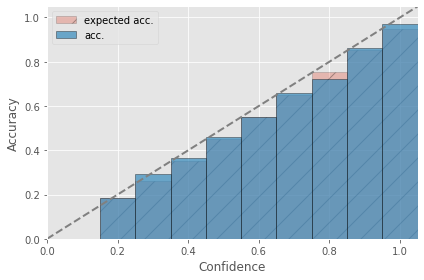

In [92]:
predictions, confidences, references = load_outputs("outputs/resnet-temp_cifar-10_0.7332_0.0154_0.0307")
plot_reliability_diagrams("single/RD-cifar-temp", predictions, confidences, references)

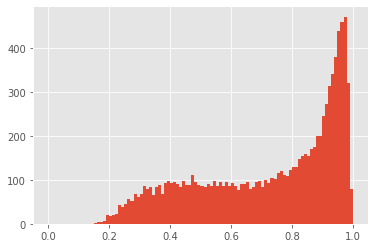

In [93]:
confidences_histogram("single/CH-cifar-temp", confidences)

## SVHN
### Uncalibrated

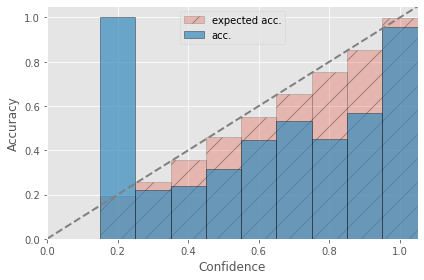

In [94]:
predictions, confidences, references = load_outputs("outputs/resnet_SVHN_0.9250_0.0510_0.8060")
plot_reliability_diagrams("single/RD-SVHN-uncali", predictions, confidences, references)

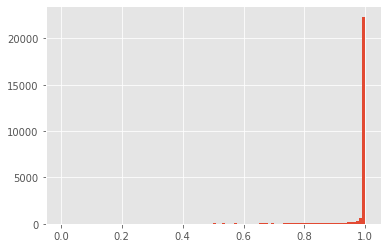

In [95]:
confidences_histogram("single/CH-SVHN-uncali", confidences)

### Platt

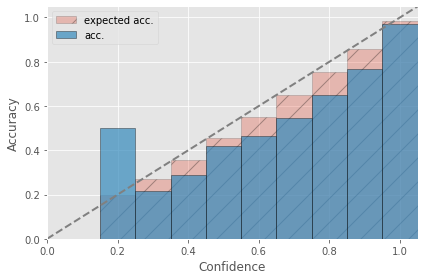

In [96]:
predictions, confidences, references = load_outputs("outputs/resnet-platt_SVHN_0.9262_0.0215_0.3040")
plot_reliability_diagrams("single/RD-SVHN-platt", predictions, confidences, references)

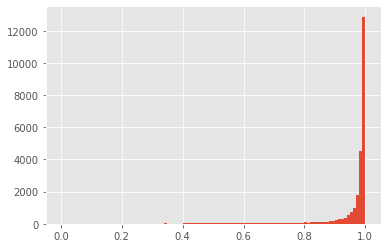

In [97]:
confidences_histogram("single/CH-SVHN-platt", confidences)

### Temperature

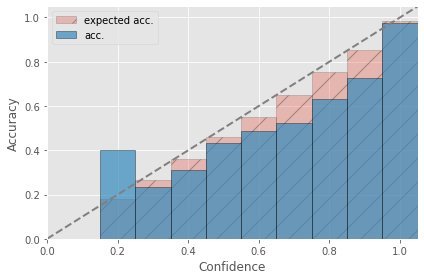

In [98]:
predictions, confidences, references = load_outputs("outputs/resnet-temp_SVHN_0.9250_0.0231_0.2203")
plot_reliability_diagrams("single/RD-SVHN-temp", predictions, confidences, references)

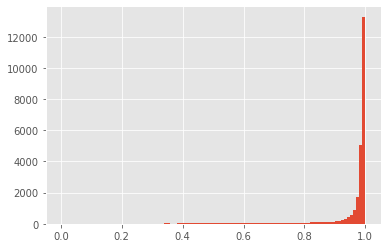

In [99]:
confidences_histogram("single/CH-SVHN-temp", confidences)

# Reliability Diagram of Ensembled Model
## CIFAR-10
### Uncalibrated

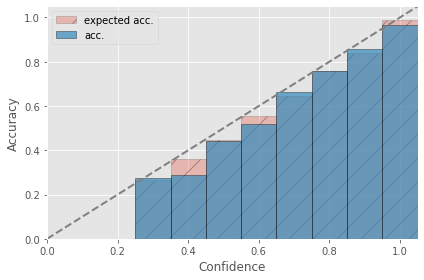

In [100]:
predictions, confidences, references = load_outputs("outputs/resnet_cifar-10_ensembled_0.7927_0.0221_0.0730")
plot_reliability_diagrams("ensemble/RD-cifar-uncali", predictions, confidences, references)

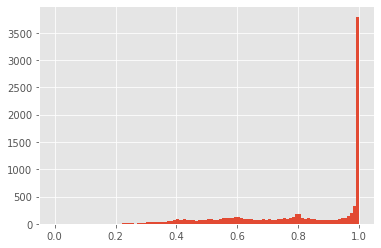

In [101]:
confidences_histogram("ensemble/CH-cifar-uncali", confidences)

### Platt

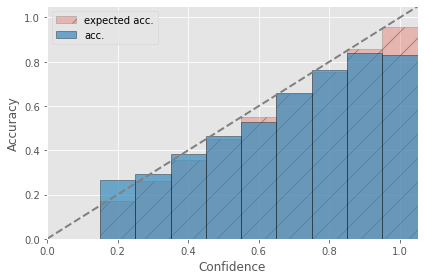

In [102]:
predictions, confidences, references = load_outputs("outputs/resnet-platt_cifar-10_ensembled_0.7154_0.0615_0.1273")
plot_reliability_diagrams("ensemble/RD-cifar-platt", predictions, confidences, references)

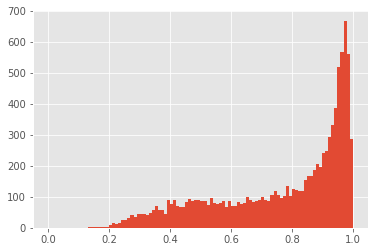

In [103]:
confidences_histogram("ensemble/CH-cifar-platt", confidences)

### Temperature

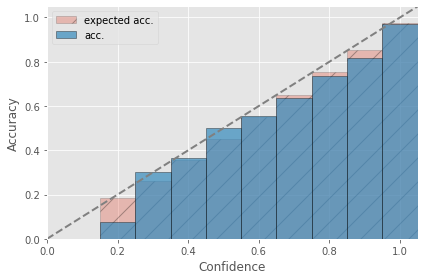

In [104]:
predictions, confidences, references = load_outputs("outputs/resnet-temp_cifar-10_ensembled_0.7997_0.0142_0.1092")
plot_reliability_diagrams("ensemble/RD-cifar-temp", predictions, confidences, references)

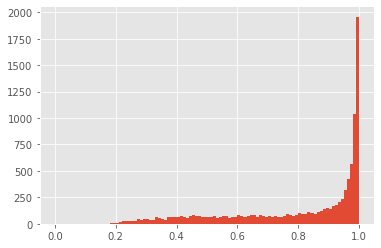

In [105]:
confidences_histogram("ensemble/CH-cifar-temp", confidences)

## SVHN
### Uncalibrated

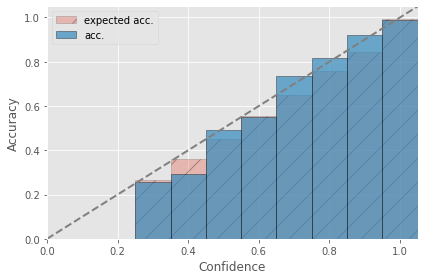

In [106]:
predictions, confidences, references = load_outputs("outputs/resnet_SVHN_ensembled_0.9471_0.0126_0.0862")
plot_reliability_diagrams("ensemble/RD-SVHN-uncali", predictions, confidences, references)

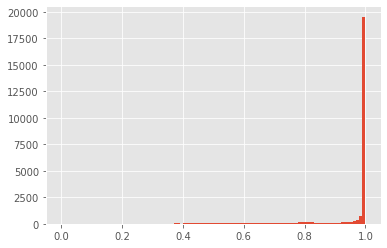

In [107]:
confidences_histogram("ensemble/CH-SVHN-uncali", confidences)

### Platt

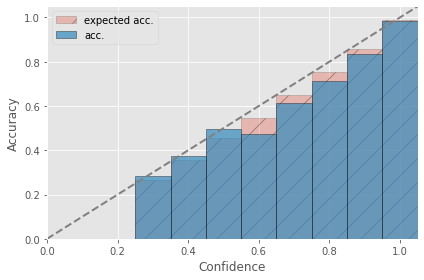

In [108]:
predictions, confidences, references = load_outputs("outputs/resnet-platt_SVHN_ensembled_0.9487_0.0067_0.0741")
plot_reliability_diagrams("ensemble/RD-SVHN-platt", predictions, confidences, references)

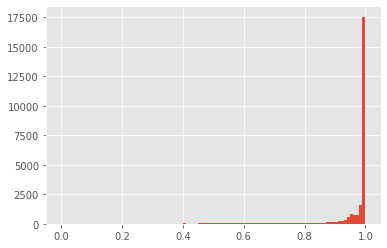

In [109]:
confidences_histogram("ensemble/CH-SVHN-platt", confidences)

### Temperature

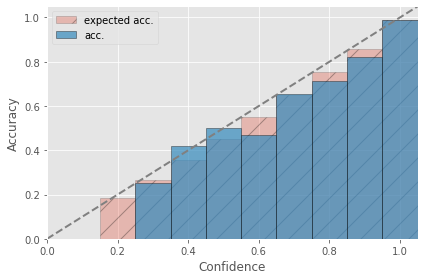

In [110]:
predictions, confidences, references = load_outputs("outputs/resnet-temp_SVHN_ensembled_0.9491_0.0058_0.1830")
plot_reliability_diagrams("ensemble/RD-SVHN-temp", predictions, confidences, references)

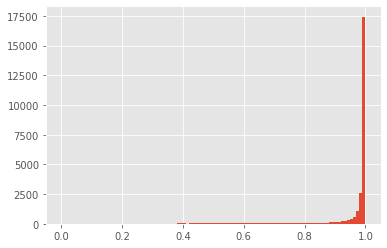

In [111]:
confidences_histogram("ensemble/CH-SVHN-temp", confidences)